##

In [1]:
import statsmodels.formula.api as smf
import wooldridge as woo
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
wage = woo.data("wage1")
wage.describe

<bound method NDFrame.describe of       wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0     3.10    11      2       0         0       1        0       2     1   
1     3.24    12     22       2         0       1        1       3     1   
2     3.00    11      2       0         0       0        0       2     0   
3     6.00     8     44      28         0       0        1       0     1   
4     5.30    12      7       2         0       0        1       1     0   
..     ...   ...    ...     ...       ...     ...      ...     ...   ...   
521  15.00    16     14       2         0       1        1       2     0   
522   2.27    10      2       0         0       1        0       3     0   
523   4.67    15     13      18         0       0        1       3     0   
524  11.56    16      5       1         0       0        1       0     0   
525   3.50    14      5       4         1       1        0       2     0   

     northcen  ...  trcommpu  trade  services  profse

###  Use the WAGE1 dataset from the Wooldridge python module.

a) are the residuals from this regression normally distributed? Use a statistical test to support your
conclusion

In [2]:
reg = smf.ols('lwage ~ educ + exper + tenure + female+ married + numdep', data = wage)
results = reg.fit()
stats.jarque_bera(results.resid)
## p-value is very small. Reject null hypothesis. Residuals are not normally distributed.

Jarque_beraResult(statistic=21.13326787598498, pvalue=2.57613838318127e-05)

In [3]:
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     58.54
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           3.15e-55
Time:                        16:30:10   Log-Likelihood:                -277.50
No. Observations:                 526   AIC:                             569.0
Df Residuals:                     519   BIC:                             598.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4894      0.109      4.492      0.000       0.275       0.703
educ           0.0839      0.007     11.534      0.000       0.070       0.098
exper          0.0031      0.002      1.830      0.068      -0.000       0.007
tenure         0.0169      0.003      5.700      0.000       0.011       0.023
female        -0.2856      0.037     -7.648      0.000      -0.359      -0.212
married        0.1256      0.041      3.046      0.002       0.045       0.207
numdep         0.0003      0.015      0.018      0.986      -0.030       0.030
==============================================================================
Omnibus:                       11.872   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.133
Skew:                           0.071   Prob(JB):                     2.58e-05
Kurtosis:                       3.972   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The residuals are not normally distributed because the p-value of JB test is significant.

(b) On a single plot show the fitted values, observed values, prediction interval, and confidence
interval from the regression in part a

In [4]:
subdata0 = wage[[ "educ", "exper", "tenure", "female", "married", "numdep"]].copy()
xrange=pd.DataFrame()
for column in subdata0:
    linspace = np.linspace(subdata0[column].min(), subdata0[column].max(), 200)
    xrange[column]=pd.Series(linspace)
xrange

,educ,exper,tenure,female,married,numdep
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,0.090452,1.251256,0.221106,0.005025,0.005025,0.030151
2,0.180905,1.502513,0.442211,0.010050,0.010050,0.060302
3,0.271357,1.753769,0.663317,0.015075,0.015075,0.090452
4,0.361809,2.005025,0.884422,0.020101,0.020101,0.120603
...,...,...,...,...,...,...
195,17.638191,49.994975,43.115578,0.979899,0.979899,5.879397
196,17.728643,50.246231,43.336683,0.984925,0.984925,5.909548
197,17.819095,50.497487,43.557789,0.989950,0.989950,5.939698
198,17.909548,50.748744,43.778894,0.994975,0.994975,5.969849


In [5]:
predictions = results.get_prediction(xrange)
predictions = predictions.summary_frame(alpha=0.05)
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.492490,0.108152,0.280019,0.704960,-0.345946,1.330926
1,0.503805,0.107172,0.293261,0.714349,-0.334145,1.341754
2,0.515119,0.106195,0.306495,0.723744,-0.322350,1.352589
3,0.526434,0.105221,0.319723,0.733145,-0.310561,1.363429
4,0.537749,0.104251,0.332944,0.742554,-0.298777,1.374275
...,...,...,...,...,...,...
195,2.698880,0.142946,2.418056,2.979704,1.840572,3.557188
196,2.710195,0.144003,2.427294,2.993096,1.851205,3.569185
197,2.721510,0.145062,2.436529,3.006491,1.861833,3.581187
198,2.732825,0.146122,2.445761,3.019888,1.872455,3.593195


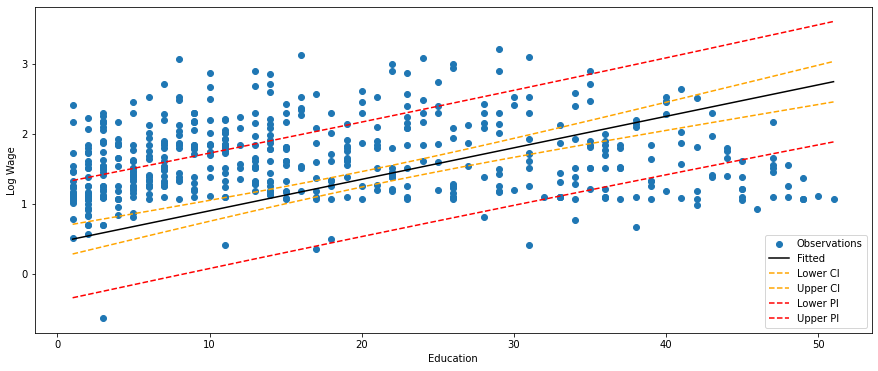

In [6]:
plt.figure(figsize = (15, 6))
plt.scatter(wage.exper, wage.lwage)
plt.plot(xrange["exper"], predictions["mean"], color = "black")

plt.xlabel("Education")
plt.ylabel("Log Wage")

# confidence Intervals
plt.plot(xrange["exper"], predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange["exper"], predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange["exper"], predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange["exper"], predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

(c) Generate bootstrap standard errors, and a 95% confidence interval for β2 from the
regression in part (a). 

In [7]:
# build dataframe to store sample statistics
coefs = pd.DataFrame(columns = ["B0","B1","B2","B3","B4","B5","B6"])

# we will generate 1000 bootstrap samples
for i in range(1000):
    
    # sample from the data with replacement N times
    sample = wage.sample(wage.shape[0] ,replace = True)
    
    # pull out the bootstrap sample statistics
    b0,b1,b2,b3,b4,b5,b6 = results.params

    
    # store the bootstrap sample statistics for later use
    coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/3565161055.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5,"B6":b6}, ignore_index = True)
/var/folders/81/jjv33vws4cs7b2l

In [8]:
# the 97.5 percentile of thebootstrap sample statistics
b2_u = coefs.iloc[:, 2].quantile(.95)
# the 2.5 percentile of the bootstrap sample statistics
b2_l = coefs.iloc[:, 2].quantile(.05)

In [9]:
results = smf.ols('lwage ~ educ + exper + tenure + female+ married + numdep', wage).fit()
b0,b1,b2,b3,b4,b5,b6 = results.params

In [10]:
# calculate the bootstrap standard error over the bootstrap statsitics for beta1
se_bt = coefs.B2.std(ddof = 1)
print(se_bt)
# calculate the basic CI
print([b2-1.96*se_bt, b2+1.96*se_bt])

0.0
[0.0031398064996774467, 0.0031398064996774467]


beta2 is different from zero.

(d) Try at least 5 different possible sub-models using Mallow’s CP. 

In [11]:
subdata = wage[["lwage", "educ", "exper", "tenure", "female", "married", "numdep"]].copy()
from RegscorePy import mallow
import itertools

# Getting the Base Model
model = smf.ols(formula = 'lwage ~ educ + exper + tenure + female+ married + numdep',data=wage)
mfit = model.fit()
y = wage['lwage']
y_pred = mfit.fittedvalues
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 7

In [12]:
for L in range(1, len(subdata.columns[1:]) + 1):
    for subset in itertools.combinations(subdata.columns[1:],L):
        formula1='lwage~' + '+'.join(subset)
        resultss= smf.ols(formula=formula1,data = wage).fit()
        y_sub=resultss.fittedvalues
        p=len(subset)+1

        cp=mallow.mallow(y,y_pred,y_sub,k,p)

        storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)

final = pd.DataFrame(storage_cp.sort_values(by = "CP"))
pd.set_option('display.max_colwidth', -1)

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append meth

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append meth

/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
/var/folders/81/jjv33vws4cs7b2lsyrkgf1q00000gn/T/ipykernel_1742/2661990378.py:10: FutureWarning: The frame.append meth

In [13]:
final.head()

,Variables,CP
56,"(educ, exper, tenure, female, married)",5.000309
47,"(educ, tenure, female, married)",6.465083
62,"(educ, exper, tenure, female, married, numdep)",7.0
60,"(educ, tenure, female, married, numdep)",8.3484
41,"(educ, exper, tenure, female)",12.869873


(e)Using 5-fold cross validation, compare the RMSE of the model in (a) to the one you
chose in (d).

In [14]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(wage.lwage):
    print("TRAIN:", train_index, "TEST:",test_index)

TRAIN: [106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350

In [15]:
import math
kf = KFold(n_splits = 5)

rmse_a = []
for train_index, test_index in kf.split(wage):
    # train data over training set
    results = smf.ols('lwage ~ educ + exper + tenure + female+ married + numdep', wage.iloc[train_index]).fit()
    
    # test over last split 
    s = math.sqrt(((wage.iloc[test_index]["lwage"] - results.predict(wage.iloc[test_index]))**2).mean())
    
    # append test metric
    rmse_a.append(s)
print(rmse_a)
print("Mean of original model is", np.mean(rmse_a))

[0.5091690176916178, 0.4298300624804793, 0.38846441074183014, 0.3402250208718139, 0.41420556378106477]
Mean of original model is 0.41637881511336117


In [16]:
rmse_b = []
for train_index, test_index in kf.split(wage):
    # train data over training set
    results = smf.ols('lwage ~ educ + exper + tenure + female + married', wage.iloc[train_index]).fit()
    
    # test over last split 
    s = math.sqrt(((wage.iloc[test_index]["lwage"] - results.predict(wage.iloc[test_index]))**2).mean())
    
    # append test metric
    rmse_b.append(s)
print(rmse_b)
print("Mean of new model is", np.mean(rmse_b))

[0.5083421905864373, 0.42790972375492253, 0.386307422481008, 0.34018234771677874, 0.4132086729130417]
Mean of new model is 0.41519007149043763


The new model is better because it has lower score

### Use the VOTE1 dataset from the Wooldridge python module.

(a) voteA = β0 + β1prtystrA + β2expendA + β3expendB + β4expendA ∗ expendB <br>
What is the partial effect of expendB on voteA, holding prtystrA and expendA fixed? What is the partial effect of expendA on voteA? Is the expected sign for b4 obvious?

The partial effect of expendB is is β3 + β4expendA.<br> Partial effect of expendA is β2 + β4expendB.<br>The expected sign is not obvious because increase in expendA increase voteA while increase in expendB decrease it.  

(b) Estimate the equation in part (a) and report the results in the usual form. Is the interaction term statistically significant?

In [17]:
vote = woo.data("vote1")

In [18]:
reg = smf.ols('voteA ~ prtystrA + expendA*expendB ', data = vote)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           6.77e-30
Time:                        16:30:28   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1174      4.591      6.995      0.000      23.054      41.181
prtystrA            0.3419      0.088      3.886      0.000       0.168       0.516
expendA             0.0383      0.005      7.718      0.000       0.028       0.048
expendB            -0.0317      0.005     -6.915      0.000      -0.041      -0.023
expendA:expendB -6.629e-06   7.19e-06     -0.923      0.358   -2.08e-05    7.56e-06
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.007
Skew:                          -0.004   Prob(JB):                        0.604
Kurtosis:                       2.626   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The interaction term is not significant as expected.

(c) Find the average of expendA in the sample. Fix expendA at 300 (for 300,000). What is the estimated effect of another 100,000 spent by Candidate B on voteA.

In [19]:
print("The average of expendA is",np.mean(vote.expendA))

The average of expendA is 310.6110049300111


In [20]:
print("The estimated effect of another 100,00 from B is ", 100*(-0.0317+300*(-0.000006629)))

The estimated effect of another 100,00 from B is  -3.3688700000000003


100,000 spent by Candidate B will decrease vote for A by 3.36 percent. This is a large effect for vote A

(d) Now fix expendB at 100. What is the estimated effect of ∆expendA = 100 on voteA? Does this make sense?

In [21]:
print("The estimated effect of another 100,00 from A is ", 100*(0.0383+100*(-0.000006629)))

The estimated effect of another 100,00 from A is  3.76371


100,000 spent by Candidate B will decrease vote for A by 3.36 percent. This make sense because as expendA increases voteA increases. 

(e) Estimate a model that replaces the interaction with shareA, Candidate A’s percentage share of total campaign expenditures. Does it make sense to hold both expendA and expendB
fixed, while changing shareA?

In [22]:
reg = smf.ols('voteA ~ prtystrA + expendA + expendB + shareA ', data = vote)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           9.03e-73
Time:                        16:30:28   Log-Likelihood:                -557.66
No. Observations:                 173   AIC:                             1125.
Df Residuals:                     168   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1954      2.568      7.086      0.000      13.126      23.265
prtystrA       0.1573      0.050      3.165      0.002       0.059       0.255
expendA       -0.0067      0.003     -2.354      0.020      -0.012      -0.001
expendB        0.0043      0.003      1.637      0.104      -0.001       0.009
shareA         0.4944      0.025     19.535      0.000       0.444       0.544
==============================================================================
Omnibus:                       36.148   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.238
Skew:                           0.789   Prob(JB):                     4.24e-25
Kurtosis:                       6.616   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It does not make sense because shareA is a function of expendA and expendB. By holding expendA and expendB fixed, shareA will also be fixed. Also, this model is not fit because of collinearity between shareA and expendA&B.